# inverse-design demo

## Data preparation

In [1]:
import numpy as np
import pandas as pd
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch import nn
from tqdm import trange
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
data = pd.read_csv("data/data_inverse_model.csv")
X_name = [f'element {i}' for i in range(1,13)]
Y_name = [f'property {i}' for i in range(1,7)]
X = np.array(data[X_name].values)
Y = np.array(data[Y_name].values)
scaler = StandardScaler()
Y = scaler.fit_transform(Y)

TARGET = [-0.05795637837567597
         , 0.6312238714021171
         , 0.759084924046567
         , 0.39885104208581484
         , -0.003599773609153955
         , 1.3429499392913864]
GROUND_TRUTH = [0.693550627,0.199083291,0.055558128,
                0.032408908,0.009259688,0.009259688,
                0.000324089,0.000277791,0.000277791,
                0,0,0]

RFR = RandomForestRegressor()
example_model = RFR.fit(pd.DataFrame(X),pd.DataFrame(Y)) #use to measure the accuracy
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# move tensors to GPU (or CPU)
X_train = torch.tensor(X_train).to(device)
Y_train = torch.tensor(Y_train).to(device)
X_test = torch.tensor(X_test).to(device)
Y_test = torch.tensor(Y_test).to(device)

## inverse-design-direct

In [9]:
from inverse_design_direct.direct_design import train_NN_clean, train_NN

### NN

In [10]:
model_nn, loss_hist, R2_hist= train_NN(Y_train, X_train, max_iter=30000)

epoch: 100, loss: 0.0569, R^2: -4610.7565
epoch: 200, loss: 0.0534, R^2: -3460.0772
epoch: 300, loss: 0.0496, R^2: -2553.2198
epoch: 400, loss: 0.0450, R^2: -1916.3907
epoch: 500, loss: 0.0387, R^2: -1392.0667
epoch: 600, loss: 0.0320, R^2: -931.9117
epoch: 700, loss: 0.0271, R^2: -599.6512
epoch: 800, loss: 0.0242, R^2: -397.5196
epoch: 900, loss: 0.0227, R^2: -282.2751
epoch: 1000, loss: 0.0217, R^2: -214.0963
epoch: 1100, loss: 0.0209, R^2: -173.0734
epoch: 1200, loss: 0.0195, R^2: -146.8873
epoch: 1300, loss: 0.0178, R^2: -126.1127
epoch: 1400, loss: 0.0162, R^2: -107.5363
epoch: 1500, loss: 0.0147, R^2: -93.4487
epoch: 1600, loss: 0.0133, R^2: -83.0144
epoch: 1700, loss: 0.0124, R^2: -74.5865
epoch: 1800, loss: 0.0117, R^2: -68.9206
epoch: 1900, loss: 0.0111, R^2: -66.0454
epoch: 2000, loss: 0.0105, R^2: -63.7959
epoch: 2100, loss: 0.0101, R^2: -60.6396
epoch: 2200, loss: 0.0097, R^2: -57.0188
epoch: 2300, loss: 0.0094, R^2: -52.9555
epoch: 2400, loss: 0.0092, R^2: -48.3642
epoch:

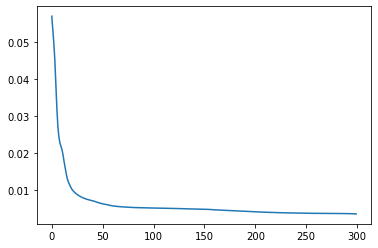

In [11]:
plt.plot(loss_hist)

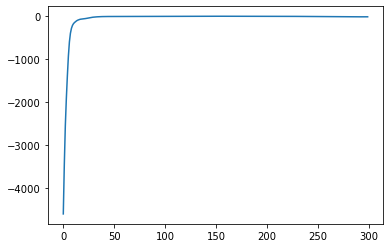

In [12]:
plt.plot(R2_hist)

In [13]:
with torch.no_grad():
    MAE_NN = mean_absolute_error(model_nn(Y_test).cpu().numpy(), X_test.cpu().numpy())
    print(mean_absolute_error(model_nn(Y_test).cpu().numpy(), X_test.cpu().numpy()))

0.01495852170594022


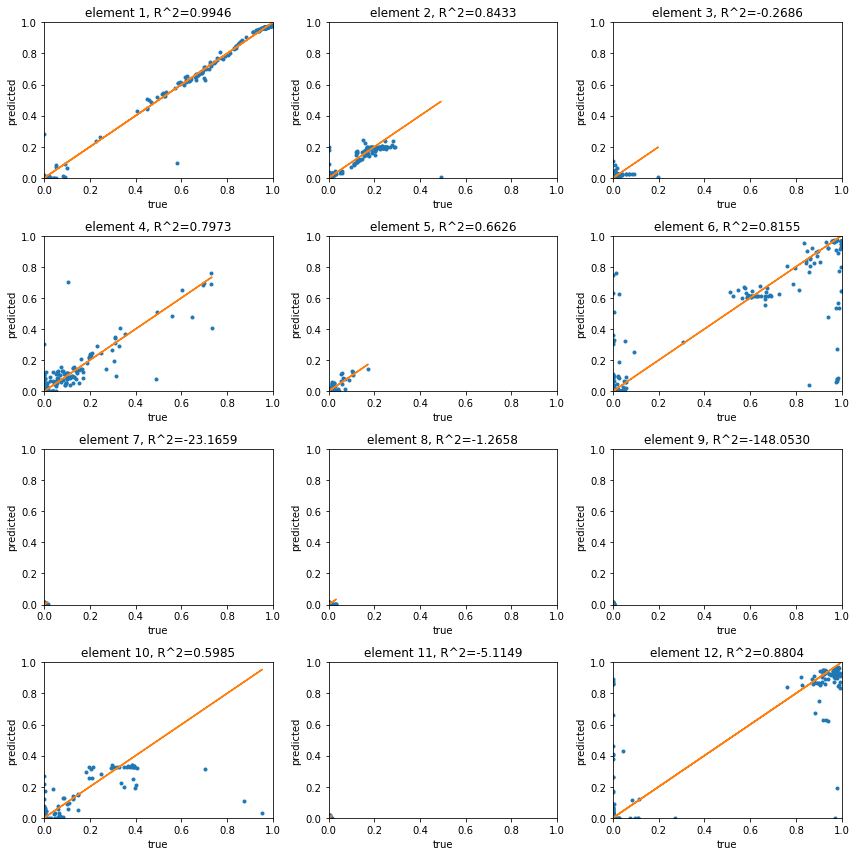

In [14]:
with torch.no_grad():
    X_pred = model_nn(Y_test).cpu().numpy()
    X_true = X_test.cpu().numpy()

fig, axs = plt.subplots(4, 3, figsize=(12,12))
for i in range(12):
    X_bar = np.mean(X_true[:,i])
    R_2 = 1 - np.sum((X_true[:,i] - X_pred[:,i])**2) / np.sum((X_true[:,i] - X_bar)**2)
    ax = axs[i // 3, i % 3]
    ax.plot(X_true[:, i], X_pred[:, i], '.')
    ax.plot(X_true[:, i], X_true[:, i], '-')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('true')
    ax.set_ylabel('predicted')
    ax.set_title(f'{X_name[i]}, R^2={R_2:.4f}')

plt.tight_layout()
plt.show()

### NN-clean

In [15]:
model_nn_clean, loss_hist, R2_hist= train_NN_clean(Y_train, X_train, max_iter=30000)

epoch: 100, loss: 0.0550, R^2: -3602.2232
epoch: 200, loss: 0.0511, R^2: -2644.1782
epoch: 300, loss: 0.0475, R^2: -1897.7490
epoch: 400, loss: 0.0434, R^2: -1405.0716
epoch: 500, loss: 0.0372, R^2: -1037.7259
epoch: 600, loss: 0.0305, R^2: -688.4183
epoch: 700, loss: 0.0260, R^2: -426.2256
epoch: 800, loss: 0.0236, R^2: -276.8637
epoch: 900, loss: 0.0223, R^2: -196.9725
epoch: 1000, loss: 0.0216, R^2: -151.4377
epoch: 1100, loss: 0.0212, R^2: -122.9151
epoch: 1200, loss: 0.0209, R^2: -103.8460
epoch: 1300, loss: 0.0206, R^2: -90.4909
epoch: 1400, loss: 0.0202, R^2: -80.7773
epoch: 1500, loss: 0.0195, R^2: -73.3581
epoch: 1600, loss: 0.0178, R^2: -66.2021
epoch: 1700, loss: 0.0160, R^2: -56.4282
epoch: 1800, loss: 0.0146, R^2: -49.2540
epoch: 1900, loss: 0.0132, R^2: -44.5143
epoch: 2000, loss: 0.0122, R^2: -40.3770
epoch: 2100, loss: 0.0115, R^2: -37.6536
epoch: 2200, loss: 0.0109, R^2: -36.3386
epoch: 2300, loss: 0.0103, R^2: -34.3975
epoch: 2400, loss: 0.0099, R^2: -31.8422
epoch: 2

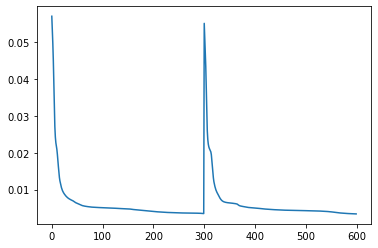

In [16]:
plt.plot(loss_hist)

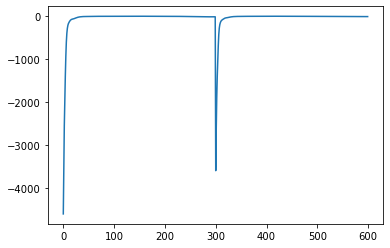

In [17]:
plt.plot(R2_hist)

In [18]:
with torch.no_grad():
    MAE_CLEAN_NN = mean_absolute_error(model_nn(Y_test).cpu().numpy(), X_test.cpu().numpy())
    print(mean_absolute_error(model_nn_clean(Y_test).cpu().numpy(), X_test.cpu().numpy()))

0.014842791377505203


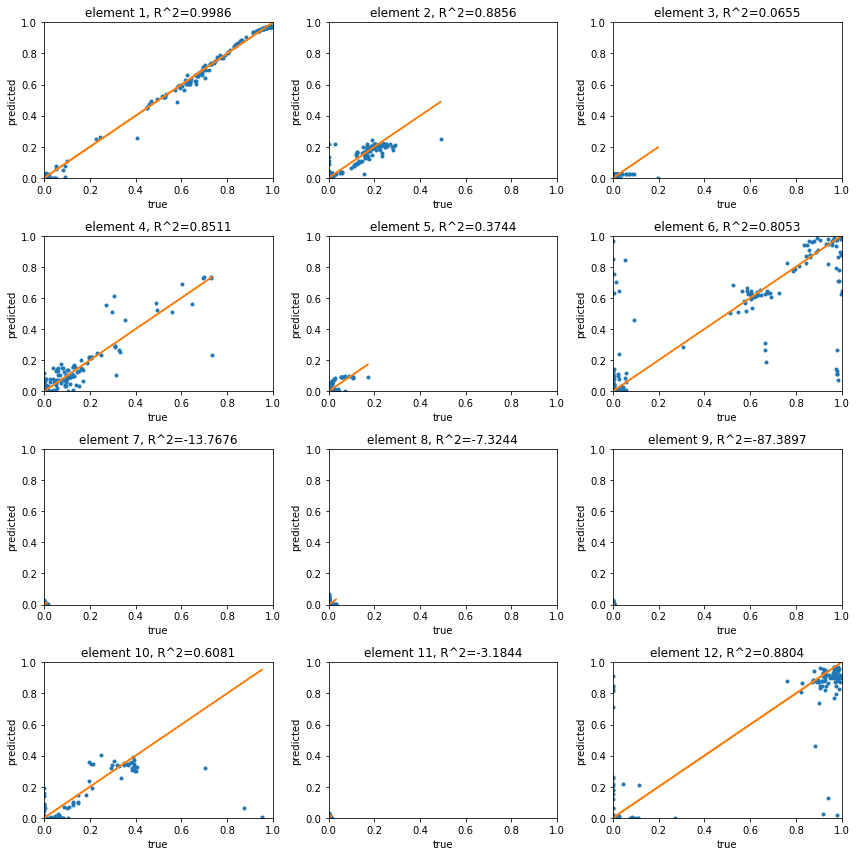

In [13]:
with torch.no_grad():
    X_pred = model_nn_clean(Y_test).cpu().numpy()
    X_true = X_test.cpu().numpy()

fig, axs = plt.subplots(4, 3, figsize=(12,12))
for i in range(12):
    X_bar = np.mean(X_true[:,i])
    R_2 = 1 - np.sum((X_true[:,i] - X_pred[:,i])**2) / np.sum((X_true[:,i] - X_bar)**2)
    ax = axs[i // 3, i % 3]
    ax.plot(X_true[:, i], X_pred[:, i], '.')
    ax.plot(X_true[:, i], X_true[:, i], '-')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('true')
    ax.set_ylabel('predicted')
    ax.set_title(f'{X_name[i]}, R^2={R_2:.4f}')

plt.tight_layout()
plt.show()

## inverse-search with BO, Tree-structured Parzen Estimator & CMA-ES

In [3]:
from inverse_design_iterative.inverse_search import inverse_search, inverse_BO

### BO method

In [4]:
target_list = []
X_MAE_list = []
for i in trange(len(Y_test)):

    Y_given = Y_test[i].reshape(1, -1)
    target, X_best = inverse_BO(X_train, Y_train, Y_given,scaler)

    target_list.append(target)
    X_MAE_list.append(mean_absolute_error(X_best, X_test[i].reshape(1, -1)))

100%|██████████████████████████████████████████████████████████████████████████████| 392/392 [1:48:56<00:00, 16.67s/it]


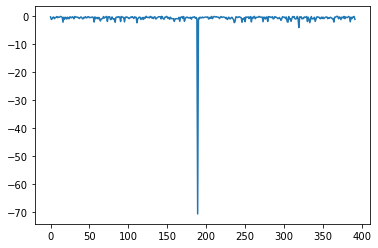

In [5]:
plt.plot(target_list)

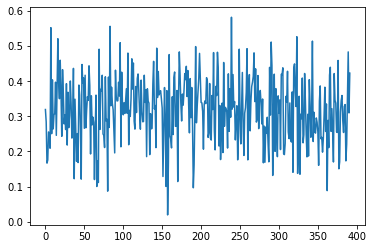

In [6]:
plt.plot(X_MAE_list)

In [7]:
MAE_BO = np.mean(X_MAE_list)
MAE_BO

0.31689873826203346

### Tree-structured Parzen Estimator & CMA-ES method


In [22]:
ex_TPE = inverse_search(model = example_model,
                        target = TARGET,
                        trial_num = 1000, #the circle of exploration
                        sampler="TPE", #three algorithms of sampling including "TPE"(Tree-structured Parzen Estimator),"CMA"(CMA-ES) and "RANDOM"(random sampling)
                        optim="MSE", #three optimizers including "MSE","MAE" and "R2"
                        use_soft=False, # using softmax function
                        pow_num=2   #using exponential function and the power frequency
                        )#only for sklearn model api

In [23]:
ex_CMA = inverse_search(model = example_model,
                        target = TARGET,
                        trial_num = 1000, #the circle of exploration
                        sampler="CMA", #three algorithms of sampling including "TPE"(Tree-structured Parzen Estimator),"CMA"(CMA-ES) and "RANDOM"(random sampling)
                        optim="MSE", #three optimizers including "MSE","MAE" and "R2"
                        use_soft=False, # using softmax function
                        pow_num=2   #using exponential function and the power frequency
                        )#only for sklearn model api

In [24]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
study, re_TPE = ex_TPE.run_search()

C:\ProgramData\Anaconda3\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/1000 [00:00<?, ?it/s]

Study statistics: 
  Number of finished trials:  1000
  Number of complete trials:  1000
  Best trial MSE:  0.048945524501902045
                  0
element1   0.537962
element2   0.191602
element3   0.000503
element4   0.034623
element5   0.042827
element6   0.006830
element7   0.009357
element8   0.000475
element9   0.088566
element10  0.007837
element11  0.071664
element12  0.007753


In [25]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
study, re_CMA = ex_CMA.run_search()

C:\ProgramData\Anaconda3\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/1000 [00:00<?, ?it/s]

Study statistics: 
  Number of finished trials:  1000
  Number of complete trials:  1000
  Best trial MSE:  1.23840254967237
                  0
element1   0.081986
element2   0.084869
element3   0.016953
element4   0.102044
element5   0.042219
element6   0.002376
element7   0.098878
element8   0.000016
element9   0.014051
element10  0.229728
element11  0.233005
element12  0.093876


In [31]:
MAE_TPE = mean_absolute_error(np.array(re_TPE).reshape(1, -1), np.array(GROUND_TRUTH).reshape(1, -1))
MAE_CMA = mean_absolute_error(np.array(re_CMA).reshape(1, -1), np.array(GROUND_TRUTH).reshape(1, -1))

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
re_TPE_list = []
for i in trange(len(Y_test)):
    Y_given = Y_test[i]
    print(Y_given)
    ex_TPE = inverse_search(model = example_model,
                        target = Y_given
                        trial_num = 1000, #the circle of exploration
                        sampler="TPE", #three algorithms of sampling including "TPE"(Tree-structured Parzen Estimator),"CMA"(CMA-ES) and "RANDOM"(random sampling)
                        optim="MSE", #three optimizers including "MSE","MAE" and "R2"
                        use_soft=False, # using softmax function
                        pow_num=2   #using exponential function and the power frequency
                        )#only for sklearn model api
    study, re_TPE = ex_TPE.run_search()
    re_TPE_list.append(re_TPE)
MAE_TPE = mean_absolute_error(re_TPE_list.reshape(1, -1), X_test.reshape(1, -1))

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
re_CMA_list = []
for i in trange(len(Y_test)):
    Y_given = Y_test[i]
    print(Y_given)
    ex_CMA = inverse_search(model = example_model,
                        target = Y_given
                        trial_num = 1000, #the circle of exploration
                        sampler="CMA", #three algorithms of sampling including "TPE"(Tree-structured Parzen Estimator),"CMA"(CMA-ES) and "RANDOM"(random sampling)
                        optim="MSE", #three optimizers including "MSE","MAE" and "R2"
                        use_soft=False, # using softmax function
                        pow_num=2   #using exponential function and the power frequency
                        )#only for sklearn model api
    study, re_CMA = ex_TPE.run_search()
    re_CMA_list.append(re_CMA)
MAE_TPE = mean_absolute_error(re_CMA_list.reshape(1, -1), X_test.reshape(1, -1))

## inverse-design using CVAE

In [ ]:
from inverse_design_generative.inverse_generation import inverse_design_cvae

In [ ]:
ex_vae = inverse_design_cvae(elements=X
                                , properties=Y
                                , epoch=10000
                                , target=TARGET
                                )

results, _, _ = ex_vae.run_cvae()
res = ex_vae.run_design()
MAE_CVAE = 0.3887579303411229
#MAE_CVAE = mean_absolute_error(np.array([GROUND_TRUTH]), np.array([res]))

print(res)
print(mean_absolute_error(np.array([GROUND_TRUTH]), np.array([res])))

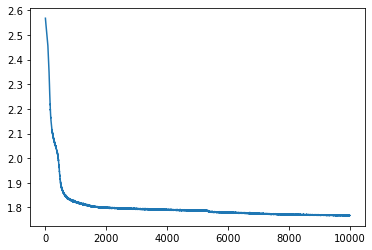

In [26]:
plt.plot(results['loss'])

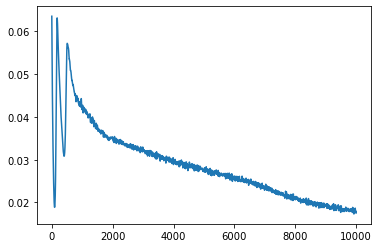

In [27]:
plt.plot(results['kld'])

In [28]:
mse_accum = []
for i in range(1000):
    ex_vae = inverse_design_cvae(elements=X
                                , properties=Y
                                , epoch=i
                                , target=TARGET
                                )

    results, _, _ = ex_vae.run_cvae()
    res = ex_vae.run_design()
    cal = example_model.predict(np.array([res]))
    mse_accum.append(mean_squared_error(cal, np.array([TARGET])))

0it [00:00, ?it/s]
100%|██████████| 1999/1999 [00:11<00:00, 169.69it/s]


In [ ]:
plt.plot(mse_accum)

# inverse-design Evaluation

In [38]:
result = [MAE_NN, MAE_CLEAN_NN, MAE_BO, MAE_TPE, MAE_CMA, MAE_CVAE]
method = ["NN","NN_clean","BO","TPE","CMA-ES","CVAE"]

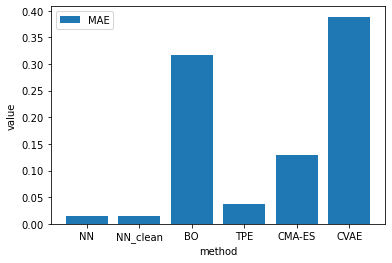

In [49]:
plt.bar(method, result, label="MAE")
plt.ylabel("value")
plt.xlabel("method")
plt.legend()
plt.savefig("reslut.png")
plt.show()
